Homework Assignment 1

\n02093428-American_Staffordshire_terrier\n02093428_10164_target.jpg


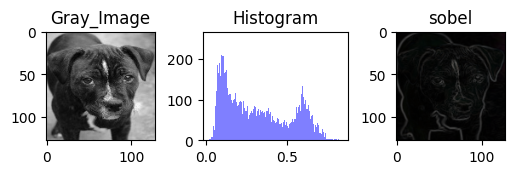

\n02093428-American_Staffordshire_terrier\n02093428_10164_target.jpg


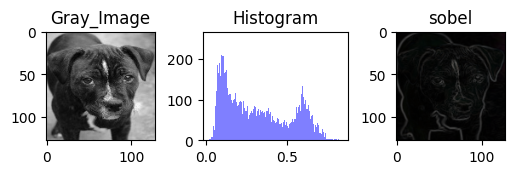

\n02105251-briard\n02105251_1201_target.jpg


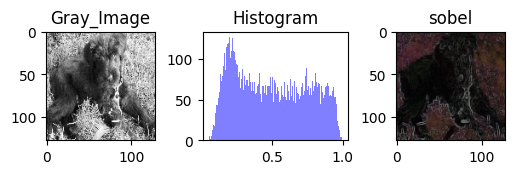

\n02105251-briard\n02105251_1240_target.jpg


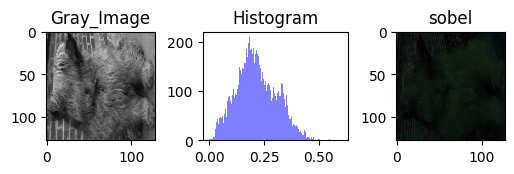

\n02107908-Appenzeller\n02107908_1030_target.jpg


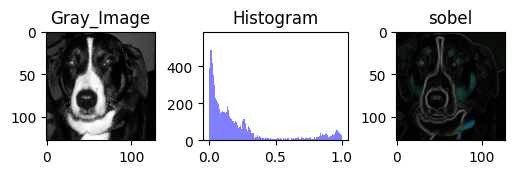

\n02107908-Appenzeller\n02107908_1176_target.jpg


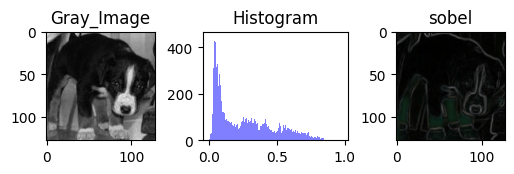

\n02113978-Mexican_hairless\n02113978_1006_target.jpg


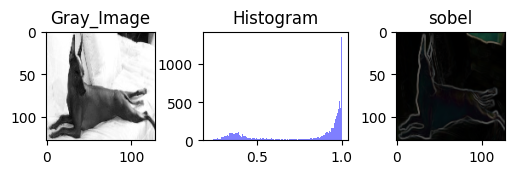

\n02113978-Mexican_hairless\n02113978_1030_target.jpg


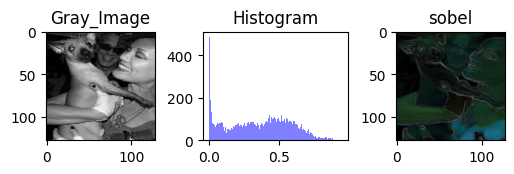

In [14]:
#Image processing


import os
import cv2
import matplotlib.pyplot as plt


#req data 
cwd=os.getcwd()
directory = r'Targetdata'
Dog_breeds = [r"\n02093428-American_Staffordshire_terrier\n02093428_10164_target.jpg",r"\n02093428-American_Staffordshire_terrier\n02093428_10164_target.jpg",
           r"\n02105251-briard\n02105251_1201_target.jpg",r"\n02105251-briard\n02105251_1240_target.jpg",
           r"\n02107908-Appenzeller\n02107908_1030_target.jpg",r"\n02107908-Appenzeller\n02107908_1176_target.jpg",
           r"\n02113978-Mexican_hairless\n02113978_1006_target.jpg",r"\n02113978-Mexican_hairless\n02113978_1030_target.jpg"]


from skimage import filters
from skimage.color import rgb2gray
#greyscale n sobel images
for breed in Dog_breeds:
    img = cv2.imread(directory + breed.strip())  # Strip to remove extra whitespace
    gray_img = rgb2gray(img)
    sobel_img = filters.sobel(img) 
    print(breed)
    fig = plt.figure()
    fig.add_subplot(331),    plt.title('Gray_Image'),    plt.imshow(gray_img, cmap=plt.get_cmap('gray')) 
    fig.add_subplot(332),    plt.title('Histogram'),    plt.hist(gray_img.ravel(), bins=256, color='b', alpha=0.5)
    fig.add_subplot(333),    plt.title('sobel'),    plt.imshow(sobel_img,cmap=plt.get_cmap('gray'))
    plt.show()


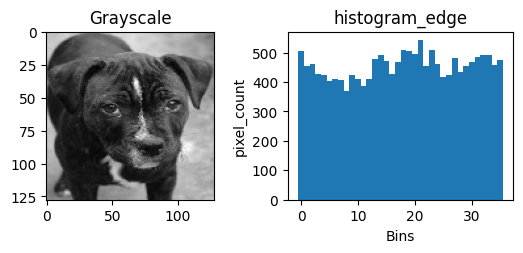

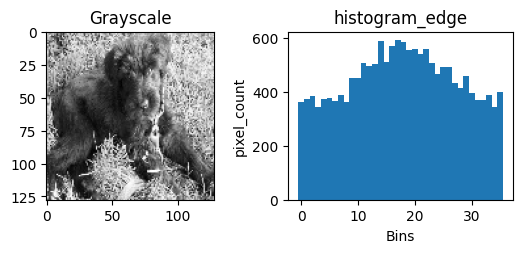

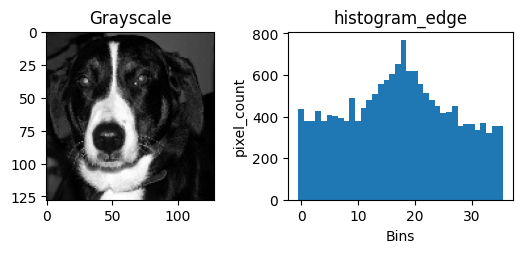

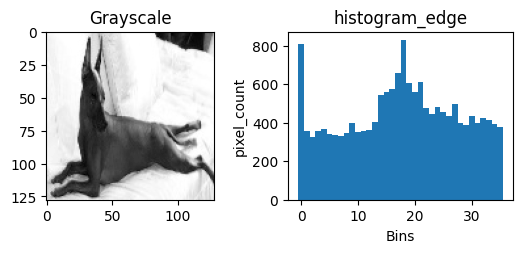

In [17]:
###  Edge histogram

from skimage import data, exposure, img_as_float
import numpy as np

def angle(dx, dy):
 """Calculate the angles between horizontal and vertical operators."""
 return np.mod(np.arctan2(dy, dx), np.pi)

directory = r'Targetdata'
Dog_breeds = [r"\n02093428-American_Staffordshire_terrier\n02093428_10164_target.jpg",
           r"\n02105251-briard\n02105251_1201_target.jpg",
           r"\n02107908-Appenzeller\n02107908_1030_target.jpg",
           r"\n02113978-Mexican_hairless\n02113978_1006_target.jpg"]


for Breedpath in Dog_breeds:
    img = cv2.imread(directory + Breedpath.strip())
    grayscale_img = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(grayscale_img),filters.sobel_v(grayscale_img))
    hist,_=exposure.histogram(angle_sobel, nbins=36)
    
    fig = plt.figure() 
    fig.add_subplot(221) ,    plt.title('Grayscale') ,    plt.imshow(grayscale_img, cmap=plt.get_cmap('gray')) 
    fig.add_subplot(222) ,    plt.title('histogram_edge') ,    plt.bar(np.arange(len(hist)), hist, width=1) ,    plt.xlabel('Bins'),    plt.ylabel('pixel_count')
    plt.show()

In [26]:
## MeasuresofSimilarityandDissimilarity
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
directory = r'Targetdata'
Dog_breeds = [r"\n02093428-American_Staffordshire_terrier\n02093428_10164_target.jpg",r"\n02093428-American_Staffordshire_terrier\n02093428_10245_target.jpg",
           r"\n02105251-briard\n02105251_1201_target.jpg"]

dist=[]
for breed in Dog_breeds:
    img = cv2.imread(directory + breed)
    grayscale_img = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(grayscale_img),filters.sobel_v(grayscale_img))
    hist,_=exposure.histogram(angle_sobel, nbins=36)
    dist.append(hist)
    
    


In [29]:
def histogram_comparison(hist1,hist2):
    print("Euclidean distance: {}".format(manhattan_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]))
    print("Manhattan distance: {}".format(euclidean_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]))
    print("Cosine distance :{} ".format(cosine_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]))

In [34]:
#comparing images of different class
histogram_comparison(dist[1],dist[2])

Euclidean distance: 5952.0
Manhattan distance: 1107.749069058512
Cosine distance :0.07858653181487085 


In [35]:
#comparing images of same class
histogram_comparison(dist[0],dist[1])

Euclidean distance: 3768.0
Manhattan distance: 727.266113606292
Cosine distance :0.03397384074751797 


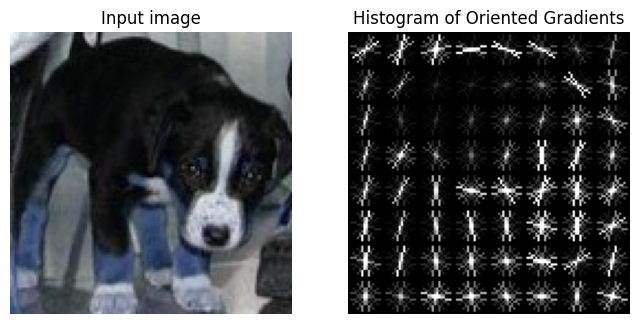

In [38]:
# ####  Histogram of Oriented Gradient (HOG) feature descriptor 

from skimage.feature import hog

image = cv2.imread(r"Targetdata\\n02107908-Appenzeller\n02107908_1176_target.jpg")


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

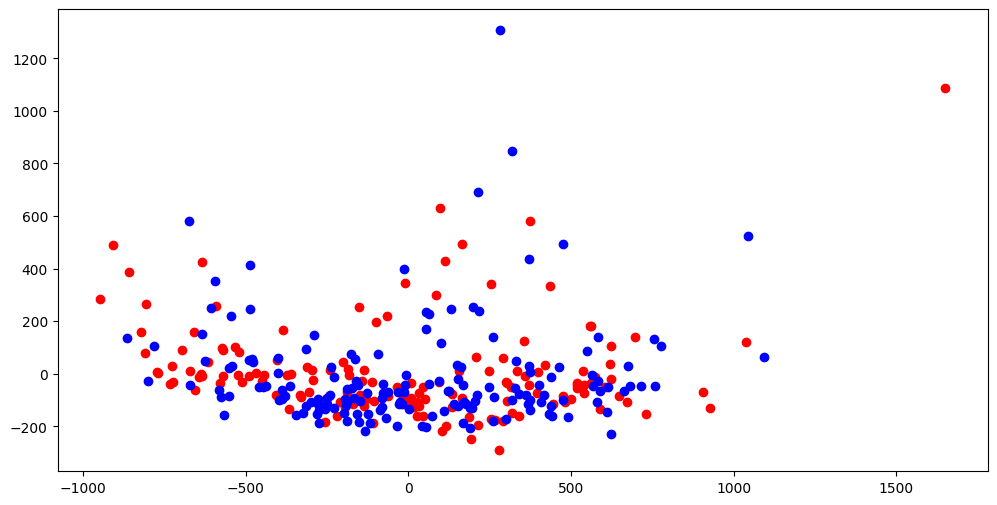

In [41]:
#PCA
from sklearn.decomposition import PCA

c1 = r"Targetdata\n02107908-Appenzeller"
c2 = r"Targetdata\n02093428-American_Staffordshire_terrier"
hist=[]

c1_images = [os.path.join(c1, filename) for filename in os.listdir(c1)]
c2_images = [os.path.join(c2, filename) for filename in os.listdir(c2)]
files = [file for file in c1_images + c2_images]

for image in files:
    img = cv2.imread(image)
    gray_img = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
    Hist,_=exposure.histogram(angle_sobel, nbins=36)
    hist.append(Hist)
l1= len(cls_1_images)
l2= len(cls_2_images)

pca_model= PCA(2)
pca= pca_model.fit_transform(hist)


plt.figure(figsize=(12, 6))
plt.scatter(pca[:l1, 0], pca[:l1, 1], c='r'),plt.scatter(pca[l1:, 0], pca[l1:, 1], c='b')
plt.show()

We see the points are little overlapped . we could not separate them truley.

citations:
https://www.kaggle.com/code/espriella/stanford-dogs-transfer-crop-stack/notebook
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html
https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py
https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.histogram
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise
https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py